<a href="https://colab.research.google.com/github/popthart/Machine-learning/blob/cs-homework/week6hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data

In [3]:
inertia = []
k_values = range(1,11)

In [8]:
inertia = []

In [9]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

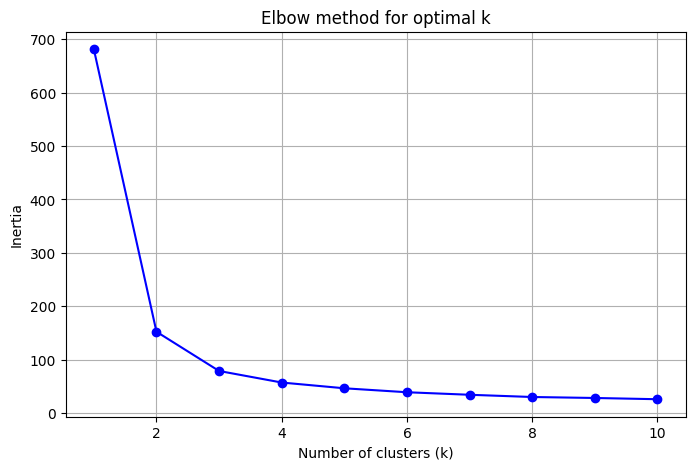

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.grid(True)
plt.show()

In [16]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
logisticRegression = LogisticRegression(solver='lbfgs', max_iter = 1000)

In [26]:
start_time_wout_pca = time.time()
logisticRegression.fit(X_train_scaled, y_train)
y_pred_wout_pca = logisticRegression.predict(X_test_scaled)
end_time_wout_pca = time.time()

In [29]:
accuracy_wout_pca = accuracy_score(y_test, y_pred_wout_pca)
time_wout_pca = end_time_wout_pca - start_time_wout_pca

In [30]:
print(f'Logistic Regression with no PCA: Accuracy = {accuracy_wout_pca:.4f}, Time = {time_wout_pca:.2f} seconds')

Logistic Regression with no PCA: Accuracy = 0.9164, Time = 270.70 seconds


In [31]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [33]:
logisticRegression_pca = LogisticRegression(solver='lbfgs', max_iter=1000)

In [34]:
start_time_pca = time.time()
logisticRegression_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegression_pca.predict(X_test_pca)
end_time_pca = time.time()

In [35]:
accuracy_pca = accuracy_score(y_test, y_pred_pca)
time_pca = end_time_pca - start_time_pca

In [36]:
print(f"Logistic Regression with PCA: Accuracy = {accuracy_pca:.4f}, Time = {time_pca:.2f} seconds")

Logistic Regression with PCA: Accuracy = 0.9216, Time = 109.95 seconds


In [39]:
print(f'\nTime difference: {time_wout_pca - time_pca:.2f} seconds')
print(f'Accuracy difference: {accuracy_wout_pca - accuracy_pca:.4f}')


Time difference: 160.75 seconds
Accuracy difference: -0.0052
